In [6]:
import h5py
# Open the HDF5 file in read mode
file_path = 'out/1TX4A_esm2_t36_3B_UR50D.h5'  # replace with your file path
with h5py.File(file_path, 'r') as h5_file:
    # List all groups
    print("Keys:", list(h5_file.keys()))
    
    # Access a specific dataset
    dataset = h5_file['1TX4A']  # replace with your dataset name
    contact_map = dataset[:]

Keys: ['1TX4A']


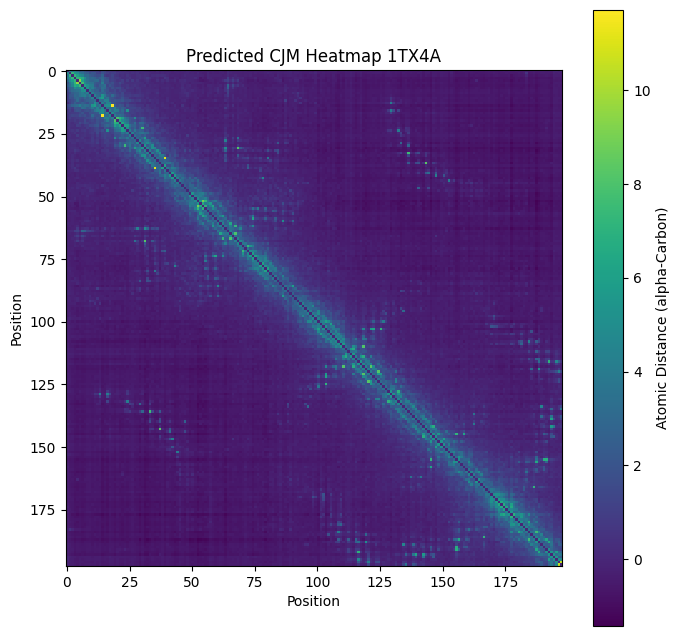

In [8]:
import matplotlib.pyplot as plt
# Plot contact map
# Make the heatmap plot
plt.figure(figsize=(8, 8))
plt.imshow(contact_map, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Atomic Distance (alpha-Carbon)")
plt.title("Predicted CJM Heatmap 1TX4A")
plt.xlabel("Position")
plt.ylabel("Position")
plt.show()

In [38]:
import numpy as np

for af in range(10, 100, 10):
    for max_gt in range(10, 100, 10):
        # Amplify the predicted matrix (you can adjust the factor as needed)
        amplification_factor = af
        amplified_predicted_matrix = contact_map * amplification_factor

        # Invert the amplified matrix valu40es to match the ground truth range
        max_ground_truth = max_gt
        inverted_amplified_matrix = max_ground_truth - amplified_predicted_matrix

        # Clip values to avoid negative numbers if necessary
        inverted_amplified_matrix = np.clip(inverted_amplified_matrix, 0, max_ground_truth)

        # Plot the result
        plt.imshow(inverted_amplified_matrix, cmap="viridis_r")
        plt.colorbar(label="Inverted & Amplified Predicted (aligned with Ground Truth)")
        plt.xlabel("Position")
        plt.ylabel("Position")
        plt.title("Inverted and Amplified Predicted Matrix")
        plt.savefig(f"amplified_test/map_{af}_{max_gt}")
        plt.clf()
    

<Figure size 640x480 with 0 Axes>